**[OptPess-LP](https://arxiv.org/pdf/2106.02684.pdf)**
---

今回は上記の論文について解説していきます。

---

CMDPについての論文なのですが、CMDPについての事前知識があると想定して進めます。



まず、この論文では２つのアルゴリズムについて説明しています。


---


１つ目は**OptPess-LP**です。

このアルゴリズムは制約違反しないような方策を事前知識として既知であると仮定して、Violationのregretを0にしています。

そして、報酬に関してのregretは$\tilde{\mathcal{O}}\left(\frac{H^3}{\tau-c^0} \sqrt{|\mathcal{S}|^3|\mathcal{A}| K}\right)$を達成しています。

Hは1エピソードのステップ数、$\tau$は制約に関してのパラメータ、$c_0$は制約違反しない安全な方策についてのパラメータです。

この報酬に関してのリグレットを[他の論文](https://arxiv.org/pdf/2003.02189.pdf)に比べると、H倍大きくなってしまっていますが、制約に関してのViolationは高確率で0を満たしてるので、安全なアルゴリズムを使いたいときはいいよねと主張しています。

---

問題設定
---



MDP $M = (\mathcal{S}, \mathcal{A}, H, P, r, c, \tau, \mu)$を考えます。

そして、価値観数は下のように定義します。

$$
V_h^\pi(s ; g, P):=\mathbb{E}_{P, \pi}\left[\sum_{t=h}^H g\left(S_t, A_t\right) \mid S_h=s\right], \quad \forall s \in \mathcal{S}
$$

上の$g$は$r,c$に置き換えて問題を考えていきます。

そしてエージェントはk番目のエピソードのhステップ目で次のようなノイズを含んだrewardとcostを受け取るとします。

加えているノイズはSub_gaussian noiseとして平均が0で1/2 sub-Gaussianとします。(集中不等式を扱いやすくするため?)

$$
R_h^k\left(S_h^k, A_h^k\right)=r_h\left(S_h^k, A_h^k\right)+\xi_h^k\left(S_h^k, A_h^k ; r\right)
$$

$$
C_h^k\left(S_h^k, A_h^k\right)=c_h\left(S_h^k, A_h^k\right)+\xi_h^k\left(S_h^k, A_h^k ; c\right)
$$

次の問題に関して最適方策$\pi^\star$を定義する。

$$
\max _\pi V_1^\pi(\mu ; r, P) \quad \text { s.t. } \quad V_1^\pi(\mu ; c, P) \leq \tau \text {. }
$$

そして、このアルゴリズムでは安全な方策を既知としているので、その仮定を次のようにします。

**仮定**

$$
V_1^{\pi^0}(\mu ; c, P)=c^0<\tau
$$

**目標**

この問題設定の目標は次のようなregretになります。

$$
\operatorname{Reg}(K ; r):=\sum_{k=1}^K\left(V_1^{\pi^*}(\mu ; r, P)-V_1^{\pi^k}(\mu ; r, P)\right)
$$



$$
\mathbb{P}\left(V_1^{\pi^k}(\mu ; c, P) \leq \tau, \forall k \in[K]\right) \geq 1-\delta
$$

---



私達は、真のCMDPの報酬、コスト、遷移確率を未知としているので、それに関してのモデルを次のように定義します。

$$
\begin{aligned}
\hat{P}_h^k\left(s^{\prime} \mid s, a\right) & :=\frac{\sum_{k^{\prime}=1}^{k-1} \mathbb{1}\left(S_h^{k^{\prime}}=s, A_h^{k^{\prime}}=a, S_{h+1}^{k^{\prime}}=s^{\prime}\right)}{N_h^k(s, a) \vee 1}, \\
\hat{g}_h^k(s, a) & :=\frac{\sum_{k^{\prime}=1}^{k-1} \mathbb{1}\left(S_h^{k^{\prime}}=s, A_h^{k^{\prime}}=a\right)\left(g_h(s, a)+\xi_h^k(s, a ; g)\right)}{N_h^k(s, a) \vee 1}, \quad \text { for } g=r, c,
\end{aligned}
$$

そして、未知の状態行動について楽観的にして探索を促進させたいので、次のようなボーナス項を報酬に加えます。

$$
\beta_h^k(s, a):=\sqrt{\frac{1}{N_h^k(s, a) \vee 1} Z}, \quad \text { where } Z:=\log \left(16|\mathcal{S}|^2|\mathcal{A}| H K / \delta\right) \text {. }
$$

$$
\bar{r}_h^k(s, a):=\hat{r}_h^k(s, a)+\alpha_r \beta_h^k(s, a), \quad \forall(s, a, h) \in \mathcal{S} \times \mathcal{A} \times[H],
$$

$\alpha_r = 1+|\mathcal{S}| H+\frac{4 H(1+|\mathcal{S}| H)}{\tau-c^0}$はスケーリング項です。

コストに関しても安全な探索を保証するために悲観的なボーナスを加えます。

$$
\underline{\mathrm{c}}_h^k(s, a):=\hat{c}_h^k(s, a)+(1+H|\mathcal{S}|) \beta_h^k(s, a), \quad \forall(s, a, h) \in \mathcal{S} \times \mathcal{A} \times[H] .
$$

そして、次のように各エピソードでポリシーを実行するとViolationが0になります。

$$
\Pi^k:= \begin{cases}\left\{\pi^0\right\} & \text { if } V_1^{\pi^0}\left(\mu ; \underline{\mathrm{c}}^k, \hat{P}^k\right) \geq\left(\tau+c^0\right) / 2, \\ \left\{\pi: V_1^\pi\left(\mu ; \underline{\mathbf{c}}^k, \hat{P}^k\right) \leq \tau\right\} & \text { otherwise. }\end{cases}
$$

つまり、$V_1^{\pi^0}\left(\mu ; \underline{\mathrm{c}}^k, \hat{P}^k\right)<\left(\tau+c^0\right) / 2$が満たされない限り、安全な方策$\pi_0$を実行し続けるということです。

アルゴリズムは下のようになります。

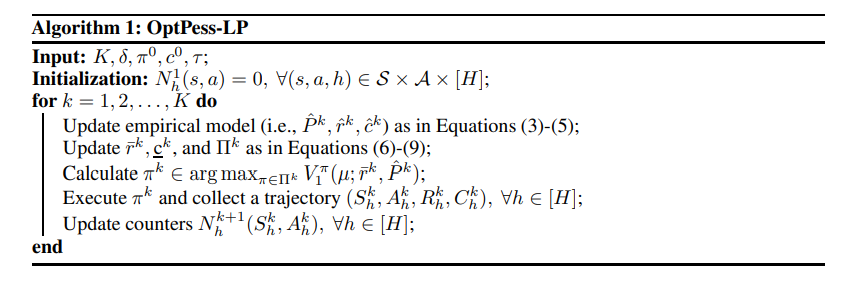
